# Fashion MNIST Image Classifier Using the Sequential API

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.0.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

In [7]:
y_train_full.shape

(60000,)

### First lets generate the validation sets
As we are going to use Gradient Descent to train the NN we need to scale the data.</br>
To scale in a range of 0-1 we will divide each element by 255 (maximum value). To make sure we get the result as a float we need to divide by 255.0 instead.

In [8]:
max_value = 255.0
validation_samples = 5000
x_valid, x_train = x_train_full[:validation_samples] / max_value, x_train_full[validation_samples:] / max_value
y_valid, y_train = y_train_full[:validation_samples], y_train_full[validation_samples:]

In [9]:
x_valid.shape

(5000, 28, 28)

In [10]:
x_valid.dtype

dtype('float64')

In [11]:
y_valid.shape

(5000,)

In [12]:
y_valid.dtype

dtype('uint8')

In [13]:
x_train.shape

(55000, 28, 28)

In [14]:
y_train.shape

(55000,)

Each value in Y represents an objet:

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
class_names[y_train[0]]

'Coat'

## Building the model
We are creating a Sequential Model. This is the simplest kind of keras model. It consists of a stack of layers sequentially connected, thus its name. </br>

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation=keras.activations.relu))
model.add(keras.layers.Dense(100, activation=keras.activations.relu))
model.add(keras.layers.Dense(10 , activation=keras.activations.softmax))

### Architecture:
Layer1: Flatten layer. Intput layer that will convert each input into a 1D array (x.reshape(-1,1)).

Layer2: Dense layer. Hidden layer containing all the conecting weights between inputs and the neurons. It uses ReLU as its activation function (hw.b(X) = ACT(XW+B))

Layer3: Dense layer. Hidden layer with 100 neurons with ReLU activation function.

Layer4: Dense later. Output layer with 1 neuron per output (10). It uses the SoftMax activation function because the clases are exclusive. 

In [18]:
# Alternatively we can initialise the model as a list of layers:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10 , activation=keras.activations.softmax)
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## Compiling the model
We will use sparse_categorical_crossentropy loss because we have a sparse labels (each target class has a unique index). If we had a OneHotMatrix instead, we would use categorical_cossentropy loss. For binary classification we would use sigmoid instead of softmax in the output layer and binary_crossentropy loss.

When using sdg optimizer we are telling Keras to train the model using StocasticGradientDescent when performing the backpropagation algorithm (reverse-mode autodiff). By default sdg optimizer has a learning rate of 0.01. This can be tuned.

#### NOTE:
Use keras.utils.to_categorical() function to convert sparse labels to OneHotVectors.</br>
To go the other way around, use np.argmax() function with axis=1.


In [21]:
model.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=[keras.metrics.sparse_categorical_accuracy]
             )

## Train the model

In [22]:
history = model.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 59us/sample - loss: 0.7199 - sparse_categorical_accuracy: 0.7632 - val_loss: 0.5136 - val_sparse_categorical_accuracy: 0.8222
Epoch 2/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4894 - sparse_categorical_accuracy: 0.8307 - val_loss: 0.4463 - val_sparse_categorical_accuracy: 0.8446
Epoch 3/30
55000/55000 [==============================] - 3s 52us/sample - loss: 0.4447 - sparse_categorical_accuracy: 0.8446 - val_loss: 0.4179 - val_sparse_categorical_accuracy: 0.8574
Epoch 4/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.4169 - sparse_categorical_accuracy: 0.8539 - val_loss: 0.3958 - val_sparse_categorical_accuracy: 0.8674
Epoch 5/30
55000/55000 [==============================] - 3s 51us/sample - loss: 0.3947 - sparse_categorical_accuracy: 0.8613 - val_loss: 0.3901 - val_sparse_categorical_accuracy: 0.8672
Epoch 6/30
55000

## Ploting the results:

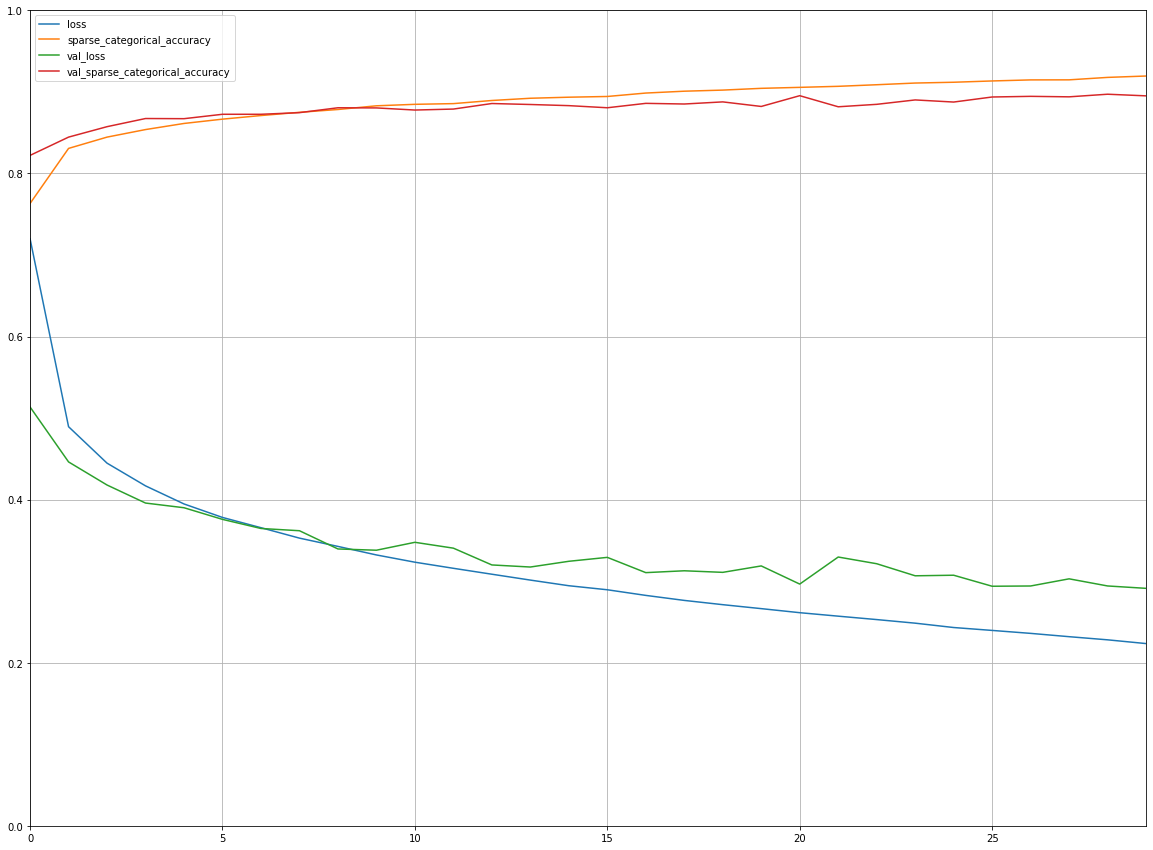

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.DataFrame(history.history).plot(figsize=(20, 15))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Vertical range.
plt.show()

## Making predictions

In [24]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[57.771077500796316, 0.8549]

In [25]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(x_new)
y_pred

array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Lets add 1 extra layer.

In [28]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(500, activation=keras.activations.relu),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation=keras.activations.relu),
    keras.layers.Dense(10 , activation=keras.activations.softmax)
])

In [30]:
model3.compile(
    loss=keras.losses.sparse_categorical_crossentropy,
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    metrics=[keras.metrics.sparse_categorical_accuracy]
             )

In [33]:
history_mod3 = model3.fit(x_train, y_train, epochs=26, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/26
55000/55000 [==============================] - 3s 54us/sample - loss: 0.1780 - sparse_categorical_accuracy: 0.9356 - val_loss: 0.3017 - val_sparse_categorical_accuracy: 0.8932
Epoch 2/26
55000/55000 [==============================] - 3s 54us/sample - loss: 0.1730 - sparse_categorical_accuracy: 0.9371 - val_loss: 0.2940 - val_sparse_categorical_accuracy: 0.8950
Epoch 3/26
55000/55000 [==============================] - 3s 55us/sample - loss: 0.1699 - sparse_categorical_accuracy: 0.9392 - val_loss: 0.3193 - val_sparse_categorical_accuracy: 0.8868
Epoch 4/26
55000/55000 [==============================] - 3s 54us/sample - loss: 0.1652 - sparse_categorical_accuracy: 0.9405 - val_loss: 0.2936 - val_sparse_categorical_accuracy: 0.8930
Epoch 5/26
55000/55000 [==============================] - 3s 54us/sample - loss: 0.1618 - sparse_categorical_accuracy: 0.9418 - val_loss: 0.2826 - val_sparse_categorical_accuracy: 0.8994
Epoch 6/26
55000

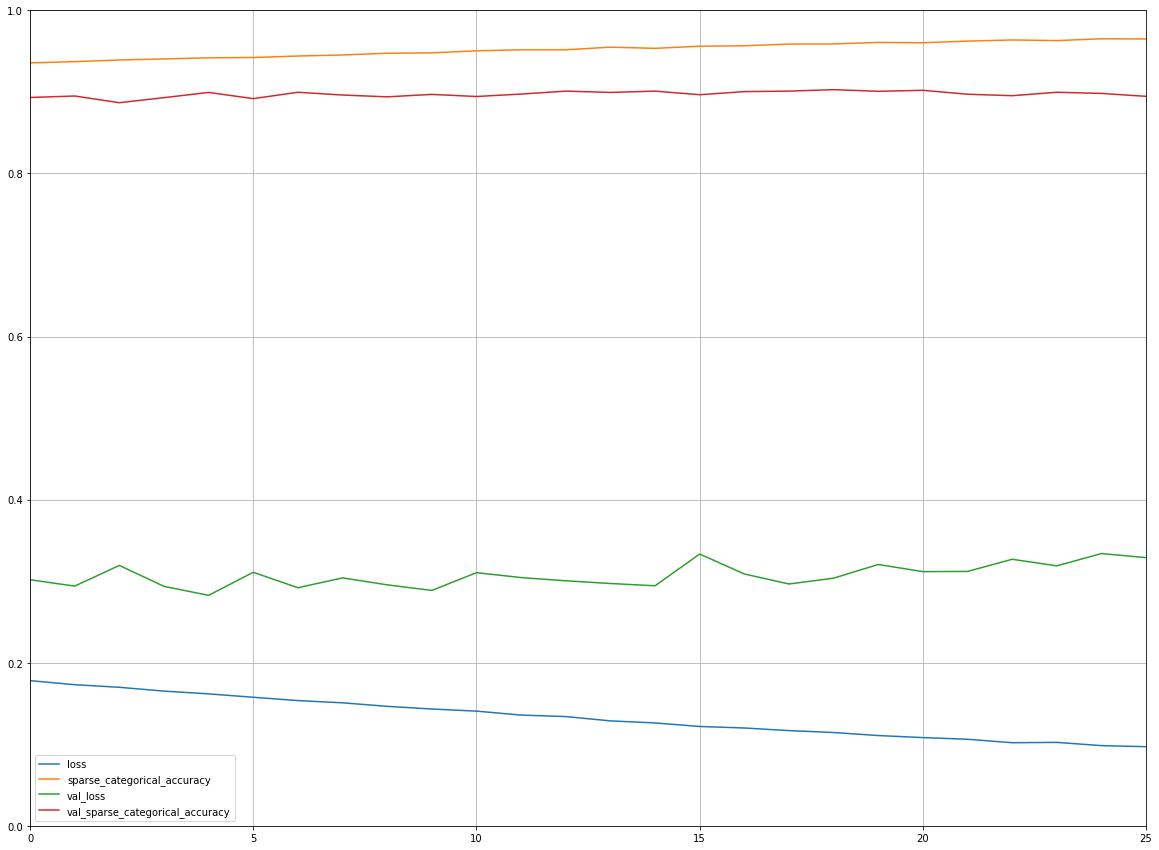

In [37]:
pd.DataFrame(history_mod3.history).plot(figsize=(model.evaluate(x_test, y_test), 15))
plt.grid(True)
plt.gca().set_ylim(0, 1) # Vertical range.
plt.show()

In [38]:
model3.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[74.6683702041626, 0.8583]